- separare in train e test set rivela i casi di overfitting
 - ma se faccio tanti esperimenti posso avere dei leak (perchè guardo continuamente le misure di test)
 - inoltre non so mai se un risultato è dovuto a una suddivisione fortunata più che alle mie scelte
- posso separare in train, validation e test, ma:
 - i dati diminuiscono
 - devo cmq trovare il modo di ripetere l'esperimento con set diversi
- k-fold ci salva dal problema!
 - usa tutti i dati di training, costruendo k modelli
 - ripete più volte l'esperimento e ho statistiche di performance
 - una volta trovato il modello e le opzioni ideali, addestro su tutto il training e verifico sul test
 
[figure scikit](https://scikit-learn.org/stable/modules/cross_validation.html)

In [61]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
tree_max_depth = 6
model = DecisionTreeClassifier(max_depth=tree_max_depth)

Qui posso lavorare sulle feature quanto voglio senza paura di leak

In [69]:

kfold_scores = cross_validate(model, X_train, y_train, cv=10,
                             scoring=['accuracy', 'precision_macro', 'recall_macro'], # macro per il multiclass
                             return_train_score=True, # altrimenti misura solo il test
                             #return_estimator=True   # restituisce i modelli addestrati
                        )

In [70]:
kfold_scores

{'fit_time': array([0.01528716, 0.01323199, 0.01226044, 0.01172781, 0.01136899,
        0.01080394, 0.01071262, 0.01255679, 0.01076055, 0.01150298]),
 'score_time': array([0.00512695, 0.00448203, 0.00227857, 0.00238657, 0.00271177,
        0.00230718, 0.00198793, 0.0022068 , 0.00238347, 0.00237083]),
 'test_accuracy': array([0.74814815, 0.79259259, 0.75555556, 0.72592593, 0.79259259,
        0.84444444, 0.74814815, 0.78358209, 0.82089552, 0.76119403]),
 'train_accuracy': array([0.80858086, 0.87376238, 0.81188119, 0.83333333, 0.86551155,
        0.85561056, 0.80940594, 0.86644683, 0.82605111, 0.87139324]),
 'test_precision_macro': array([0.76243321, 0.81907671, 0.81116883, 0.75160747, 0.82028888,
        0.86299603, 0.81143665, 0.81732705, 0.83085317, 0.79246139]),
 'train_precision_macro': array([0.85622852, 0.88447437, 0.85780535, 0.86061044, 0.88873137,
        0.87091295, 0.85932515, 0.87986288, 0.85573648, 0.88821433]),
 'test_recall_macro': array([0.74767399, 0.79622711, 0.7563736

In [71]:
df = pd.DataFrame(kfold_scores)
df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.015287,0.005127,0.748148,0.808581,0.762433,0.856229,0.747674,0.810197
1,0.013232,0.004482,0.792593,0.873762,0.819077,0.884474,0.796227,0.874742
2,0.012260,0.002279,0.755556,0.811881,0.811169,0.857805,0.756374,0.813154
3,0.011728,0.002387,0.725926,0.833333,0.751607,0.860610,0.727509,0.836373
4,0.011369,0.002712,0.792593,0.865512,0.820289,0.888731,0.796612,0.865088
5,0.010804,0.002307,0.844444,0.855611,0.862996,0.870913,0.847656,0.854263
6,0.010713,0.001988,0.748148,0.809406,0.811437,0.859325,0.750641,0.810279
7,0.012557,0.002207,0.783582,0.866447,0.817327,0.879863,0.778681,0.865517
8,0.010761,0.002383,0.820896,0.826051,0.830853,0.855736,0.821923,0.827626
9,0.011503,0.002371,0.761194,0.871393,0.792461,0.888214,0.756557,0.869916


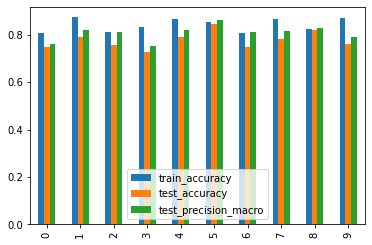

In [72]:
metrics = ['train_accuracy', 'test_accuracy', 'test_precision_macro']
df[ metrics ].plot.bar()

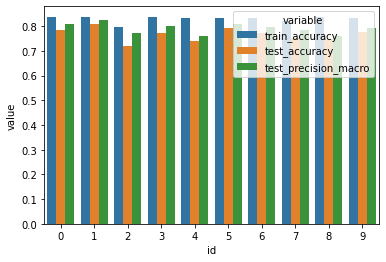

In [59]:
df['id'] = df.index
df_melted = df.melt(id_vars=['id'], value_vars=metrics)
#df_melted
sns.barplot(data=df_melted, x='id', y='value', hue='variable')

In [60]:
df.describe()

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,id
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.011691,0.002252,0.766130,0.830240,0.790677,0.849586,0.767810,0.831302,4.50000
std,0.001327,0.000372,0.026589,0.013086,0.021475,0.004643,0.025898,0.013025,3.02765
min,0.010491,0.001964,0.718519,0.795380,0.759632,0.842455,0.720586,0.796059,0.00000
25%,0.010598,0.001978,0.748134,0.833643,0.775631,0.846193,0.750160,0.834617,2.25000
50%,0.011087,0.002060,0.770370,0.834158,0.795295,0.848835,0.772738,0.835307,4.50000
75%,0.012846,0.002447,0.782919,0.836735,0.805431,0.853388,0.782720,0.837653,6.75000
max,0.014106,0.003093,0.807407,0.838284,0.825318,0.857315,0.808718,0.838821,9.00000


- Adesso posso cambiare gli iperparametri dell'albero di decisione senza aver paura che ci siano leak
- più in là vedremo come trovare i valori degli iperparametri con la *grid search*

In [77]:
model = DecisionTreeClassifier(max_depth=tree_max_depth)

model.fit(X_train, y_train)
model.score(X_test, y_test) # .score da introdurre

0.7888888888888889

Questo punteggio è ottenuto utilizzando in modo appropriato la validazione